In [1]:
from utils import base_model, feature_importance, preprocessing
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import os

In [ ]:
df = pd.read_csv('data/Bank Customer Churn Prediction.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
df = preprocessing(df)

In [5]:
features = ['credit_score', 'gender', 'age', 'tenure', 'balance',
    'products_number', 'credit_card', 'active_member', 'estimated_salary',
    'country_France', 'country_Germany', 'country_Spain', 'balance_0']
target = 'churn'

In [6]:
random.seed(42)
os.environ["PYTHONHASHSEED"] = str(42)
np.random.seed(42)

In [7]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = base_model(X_train, y_train)

최적 하이퍼 파라미터:  {'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 263}
최고 예측 정확도: 0.9464
Accuracy: 0.8350
AUC: 0.7679
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1273
           1       0.59      0.65      0.62       327

    accuracy                           0.83      1600
   macro avg       0.75      0.77      0.76      1600
weighted avg       0.84      0.83      0.84      1600



In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {auc:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.8285
AUC: 0.7616
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.55      0.65      0.60       393

    accuracy                           0.83      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.83      0.83      2000



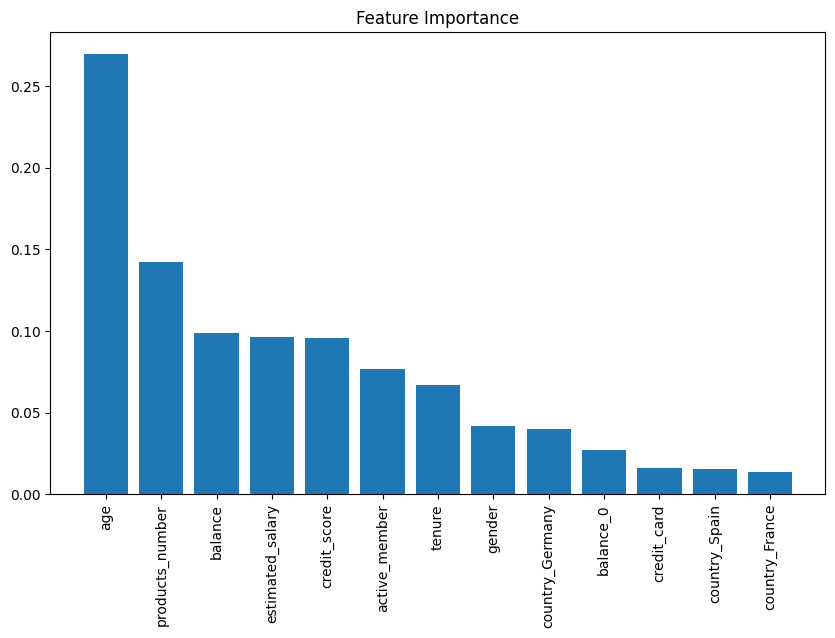

In [10]:
feature_importance(model, X_train)